In [9]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [22]:
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [23]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [8]:
pip install azure-cognitiveservices-vision-customvision

     |████████████████████████████████| 62 kB 917 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
training_key = "4404f430edb94585891e9975a8c09a56"

In [56]:
ENDPOINT = "https://customvisiondemoforudacity1-prediction.cognitiveservices.azure.com/"
prediction_key = "e736cd385daf4f968c377962417bda35"
prediction_resource_id = "/subscriptions/4cee52b8-5040-4305-b2b2-d48f49b7184e/resourceGroups/AmirResource/providers/Microsoft.CognitiveServices/accounts/CustomVisionDemoForUdacity1-Prediction"

In [65]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [88]:
local_image_path = 'lighter_test_images/'
file_name = 'lighter_test_set_5of5.jpg'

In [89]:
project_id = '6d4af71d-e7ef-45c8-80bc-4189d7a7f59a'
publish_iteration_name = "Iteration1"

In [90]:
with open(os.path.join (local_image_path, 'lighter_test_set_5of5.jpg'), "rb") as image_contents:
    results = predictor.detect_image(project_id, publish_iteration_name, image_contents.read())
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))

	Lighter: 98.53%
	Lighter: 46.24%
	Lighter: 9.43%
	Lighter: 4.67%
	Lighter: 2.89%


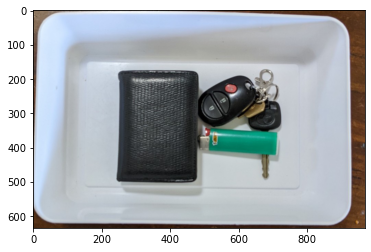

In [91]:
with open(os.path.join (local_image_path, file_name), 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)